In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
path = 'beauford.npz'
with np.load(path) as data:
    dem = data['beauford']

# downsample and remove negative values
dem = dem[::10, ::10]
dem = np.where(dem < 0, 0, dem)
dem.shape

(164, 242)

In [3]:
houses_x = np.array([117, 119, 120, 115, 130])
houses_y = np.array([100, 115, 123, 119, 139])

/var/folders/l_/zjyw1l0d37x3lbbq6x4vvs_00000gn/T/ipykernel_95665/1896412566.py:2: RuntimeWarning: divide by zero encountered in log
  plt.contour(np.log(dem), levels=100, zorder=0)


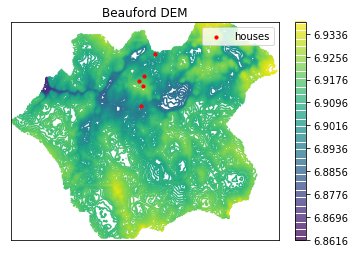

In [4]:
plt.scatter(houses_x, houses_y, c='r', s=10, label="houses", zorder=1)
plt.contour(np.log(dem), levels=100, zorder=0)
plt.legend()
plt.colorbar()
plt.title("Beauford DEM")
plt.xticks([])
plt.yticks([])
plt.savefig("imgs/beauford_dem.png")

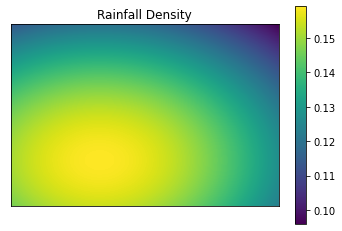

In [5]:
x = np.linspace(0, 1, dem.shape[0])
y = np.linspace(0, 1, dem.shape[1])
xm, ym = np.meshgrid(x, y)
pos = np.dstack((xm, ym))
rv = stats.multivariate_normal([0.25, 0.33], np.eye(2))
vals = rv.pdf(pos)
plt.imshow(np.flip(vals.T, axis=0))
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title("Rainfall Density")
plt.savefig("imgs/rainfall_density.png")